In [1]:
#################################################################################################################
#                                                                                                               #
#                                                                                                               #
#                                       Lawrence Perspective Data Report                                        #
#                                                                                                               #
#                                                                                                               #
#################################################################################################################

In [334]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches

In [202]:
# loads the accountability surveys as dataframes which is like 'python excel'

dfacc2016 = pd.read_excel('datasets//accountability2016schools.xlsx')
dfacc2015 = pd.read_excel('datasets//accountability2015schools.xlsx')
dfacc2014 = pd.read_excel('datasets//accountability2014schools.xlsx')
dfacc2013 = pd.read_excel('datasets//accountability2013schools.xlsx')
dfacc2012 = pd.read_excel('datasets//accountability2012schools.xlsx')

# loads the selected population surveys as dataframes

dfselectedpop2016 = pd.read_excel('datasets//selectedpopulations2016.xlsx')
dfselectedpop2015 = pd.read_excel('datasets//selectedpopulations2015.xlsx')
dfselectedpop2014 = pd.read_excel('datasets//selectedpopulations2014.xlsx')
dfselectedpop2013 = pd.read_excel('datasets//selectedpopulations2013.xlsx')
dfselectedpop2012 = pd.read_excel('datasets//selectedpopulations2012.xlsx')

# loads the school gender population surveys as dataframes (using this for the student counts)

dfpop2016= pd.read_excel('datasets//classsizebygenderpopulation2016.xlsx')
dfpop2015= pd.read_excel('datasets//classsizebygenderpopulation2015.xlsx')
dfpop2014 = pd.read_excel('datasets//classsizebygenderpopulation2014.xlsx')
dfpop2013 = pd.read_excel('datasets//classsizebygenderpopulation2013.xlsx')
dfpop2012 = pd.read_excel('datasets//classsizebygenderpopulation2012.xlsx')

# loads the schools mcas scores surveys as dataframes

dfmcas2016 = pd.read_excel('datasets//mcasschool2016.xlsx')
dfmcas2015 = pd.read_excel('datasets//mcasschool2015.xlsx')
dfmcas2012 = pd.read_excel('datasets//mcasschool2012.xlsx')

#print(dfmcas2016['school'])
dfmcas2016['district'] = dfmcas2016['school'].apply(lambda x: x[: x.index(' -')])
dfmcas2016['school'] = dfmcas2016['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfmcas2015['district'] = dfmcas2015['school'].apply(lambda x: x[: x.index(' -')]) 
dfmcas2015['school'] = dfmcas2015['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfmcas2012['district'] = dfmcas2012['school'].apply(lambda x: x[: x.index(' -')])
dfmcas2012['school'] = dfmcas2012['school'].apply(lambda x:  x[x.index(' -') + 3:])

In [203]:
def seperate_mcas(df):
    adv_ela_lst = []
    adv_mth_lst = []
    pro_ela_lst = []
    pro_mth_lst = []
    ni_ela_lst = []
    ni_mth_lst = []
    fail_ela_lst = []
    fail_mth_lst = []
    cpi_ela_lst = []
    cpi_mth_lst = []
    sgp_ela_lst = []
    sgp_mth_lst = []
    org_code = []
    
    current_school = df.iloc[0]['school']
    math_count = 0
    ela_count = 0
    for index, row in df.iterrows():
        if row['school'] == current_school:
            if row['subject'] == 'ELA':
                ela_count += 1
                adv_ela_lst.append(row['advanced'])
                pro_ela_lst.append(row['proficient'])
                ni_ela_lst.append(row['needs'])
                fail_ela_lst.append(row['fail'])
                cpi_ela_lst.append(row['cpi'])
                sgp_ela_lst.append(row['sgp'])
                org_code.append(row['org_code'])
            
            elif row['subject'] == 'MTH':
                math_count += 1
                adv_mth_lst.append(row['advanced'])
                pro_mth_lst.append(row['proficient'])
                ni_mth_lst.append(row['needs'])
                fail_mth_lst.append(row['fail'])
                cpi_mth_lst.append(row['cpi'])
                sgp_mth_lst.append(row['sgp']) 
                if row['org_code'] not in org_code:
                    org_code.append(row['org_code'])
                    
                
        else:
            current_school = row['school']
            if math_count < ela_count:
                #print("math",index)
                for i in range(ela_count - math_count):
                    adv_mth_lst.append(None)
                    pro_mth_lst.append(None)
                    ni_mth_lst.append(None)
                    fail_mth_lst.append(None)
                    cpi_mth_lst.append(None)
                    sgp_mth_lst.append(None) 
                    
            elif ela_count < math_count:
                #print("ela",index)
                for i in range(math_count - ela_count):
                    adv_ela_lst.append(None)
                    pro_ela_lst.append(None)
                    ni_ela_lst.append(None)
                    fail_ela_lst.append(None)
                    cpi_ela_lst.append(None)
                    sgp_ela_lst.append(None) 
                    org_code.append(row['org_code'])
                
            if row['subject'] == 'ELA':
                ela_count = 1
                math_count = 0
                adv_ela_lst.append(row['advanced'])
                pro_ela_lst.append(row['proficient'])
                ni_ela_lst.append(row['needs'])
                fail_ela_lst.append(row['fail'])
                cpi_ela_lst.append(row['cpi'])
                sgp_ela_lst.append(row['sgp'])
                org_code.append(row['org_code'])
            
            elif row['subject'] == 'MTH':
                math_count = 1
                ela_count = 0
                adv_mth_lst.append(row['advanced'])
                pro_mth_lst.append(row['proficient'])
                ni_mth_lst.append(row['needs'])
                fail_mth_lst.append(row['fail'])
                cpi_mth_lst.append(row['cpi'])
                sgp_mth_lst.append(row['sgp']) 
            else:
                math_count = 0
                ela_count = 0
            
    dfnew = pd.DataFrame(org_code, columns=['org_code'])
    print("dfnew:",len(dfnew))
    print("len adv_ela:",len(adv_ela_lst), "len adv_mth",len(adv_mth_lst))
    dfnew['adv_ela'] = adv_ela_lst
    dfnew['adv_mth'] = adv_mth_lst
    dfnew['pro_ela'] = pro_ela_lst
    dfnew['pro_mth'] = pro_mth_lst
    dfnew['ni_ela'] = ni_ela_lst
    dfnew['ni_mth'] = ni_mth_lst
    dfnew['fail_ela'] = fail_ela_lst
    dfnew['fail_mth'] = fail_mth_lst
    dfnew['cpi_ela'] = cpi_ela_lst
    dfnew['cpi_mth'] = cpi_mth_lst
    dfnew['sgp_ela'] = sgp_ela_lst
    dfnew['sgp_mth'] = sgp_mth_lst
        
    return dfnew
    
dfmcas2012 = seperate_mcas(dfmcas2012)
dfmcas2015 = seperate_mcas(dfmcas2015)
dfmcas2016 = seperate_mcas(dfmcas2016)

dfnew: 1651
len adv_ela: 1651 len adv_mth 1651
dfnew: 898
len adv_ela: 898 len adv_mth 898
dfnew: 646
len adv_ela: 646 len adv_mth 646


In [204]:
# adds the high needs columns from the selected populations survey to the pop dataframe
dfpop2016 = dfpop2016.merge(dfselectedpop2016, on='org_code')
dfpop2015 = dfpop2015.merge(dfselectedpop2015, on='org_code')
dfpop2014 = dfpop2014.merge(dfselectedpop2014, on='org_code')
dfpop2013 = dfpop2013.merge(dfselectedpop2013, on='org_code')
dfpop2012 = dfpop2012.merge(dfselectedpop2012, on='org_code')

# removes all rows where level is absent or marked insufficient data in the accountability surveys

dfacc2016 = dfacc2016[dfacc2016.level_2016 != 'Insufficient data']
dfacc2016 = dfacc2016[dfacc2016['level_2016'].notnull()]

dfacc2015 = dfacc2015[dfacc2015.level_2015 != 'Insufficient data']
dfacc2015 = dfacc2015[dfacc2015['level_2015'].notnull()]

dfacc2014 = dfacc2014[dfacc2014.level_2014 != 'Insufficient data']
dfacc2014 = dfacc2014[dfacc2014['level_2014'].notnull()]

dfacc2013 = dfacc2013[dfacc2013.level_2013 != 'Insufficient data']
dfacc2013 = dfacc2013[dfacc2013['level_2013'].notnull()]

dfacc2012 = dfacc2012[dfacc2012.level_2012 != 'Insufficient data']
dfacc2012 = dfacc2012[dfacc2012['level_2012'].notnull()]

# changes the levels which are strings ex. 'level 1' to ints ex. '1'

dfacc2016['level_2016'] = dfacc2016['level_2016'].apply(lambda x: [int(x) for x in x.split() if x.isdigit()][0])
dfacc2015['level_2015'] = dfacc2015['level_2015'].apply(lambda x: [int(x) for x in x.split() if x.isdigit()][0])
dfacc2014['level_2014'] = dfacc2014['level_2014'].apply(lambda x: [int(x) for x in x.split() if x.isdigit()][0])
dfacc2013['level_2013'] = dfacc2013['level_2013'].apply(lambda x: [int(x) for x in x.split() if x.isdigit()][0])
dfacc2012['level_2012'] = dfacc2012['level_2012'].apply(lambda x: [int(x) for x in x.split() if x.isdigit()][0])

# gets the district and school name seperate for each row

dfacc2016['district'] = dfacc2016['school'].apply(lambda x: x[: x.index(' -')])
dfacc2016['school'] = dfacc2016['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfacc2015['district'] = dfacc2015['school'].apply(lambda x: x[: x.index(' -')])
dfacc2015['school'] = dfacc2015['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfacc2014['district'] = dfacc2014['school'].apply(lambda x: x[: x.index(' -')])
dfacc2014['school'] = dfacc2014['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfacc2013['district'] = dfacc2013['school'].apply(lambda x: x[: x.index(' -')])
dfacc2013['school'] = dfacc2013['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfacc2012['district'] = dfacc2012['school'].apply(lambda x: x[: x.index(' -')])
dfacc2012['school'] = dfacc2012['school'].apply(lambda x:  x[x.index(' -') + 3:])

# sets a name for each dataframe

dfacc2016.name = 'dfacc2016'
dfacc2015.name = 'dfacc2015'
dfacc2014.name = 'dfacc2014'
dfacc2013.name = 'dfacc2013'
dfacc2012.name = 'dfacc2012'

dfpop2016.name = 'dfpop2016'
dfpop2015.name = 'dfpop2015'
dfpop2014.name = 'dfpop2014'
dfpop2013.name = 'dfpop2013'
dfpop2012.name = 'dfpop2012'

dfmcas2016.name = 'dfmcas2016'
dfmcas2015.name = 'dfmcas2015'
dfmcas2012.name = 'dfmcas2012'

In [205]:
# gets the district and school name seperate for each row

dfpop2016['district'] = dfpop2016['school'].apply(lambda x: x[: x.index(' -')])
dfpop2016['school'] = dfpop2016['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfpop2015['district'] = dfpop2015['school'].apply(lambda x: x[: x.index(' -')])
dfpop2015['school'] = dfpop2015['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfpop2014['district'] = dfpop2014['school'].apply(lambda x: x[: x.index(' -')])
dfpop2014['school'] = dfpop2014['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfpop2013['district'] = dfpop2013['school'].apply(lambda x: x[: x.index(' -')])
dfpop2013['school'] = dfpop2013['school'].apply(lambda x:  x[x.index(' -') + 3:])
dfpop2012['district'] = dfpop2012['school'].apply(lambda x: x[: x.index(' -')])
dfpop2012['school'] = dfpop2012['school'].apply(lambda x:  x[x.index(' -') + 3:])

In [206]:
# merges the school populations survey with the accountability survey

df2016schools = pd.merge(dfacc2016, dfpop2016,  how='left', left_on=['org_code','school', 'district'], right_on = ['org_code','school','district'])
df2015schools = pd.merge(dfacc2015, dfpop2015,  how='left', left_on=['org_code','school', 'district'], right_on = ['org_code','school','district'])
df2014schools = pd.merge(dfacc2014, dfpop2014,  how='left', left_on=['org_code','school', 'district'], right_on = ['org_code','school','district'])
df2013schools = pd.merge(dfacc2013, dfpop2013,  how='left', left_on=['org_code','school', 'district'], right_on = ['org_code','school','district'])
df2012schools = pd.merge(dfacc2012, dfpop2012,  how='left', left_on=['org_code','school', 'district'], right_on = ['org_code','school','district'])

# merges the schools survey with the mcas scores survey

df2016schools = pd.merge(df2016schools, dfmcas2016, how='left', left_on=['org_code'], right_on = ['org_code'])
df2015schools = pd.merge(df2015schools, dfmcas2015, how='left', left_on=['org_code'], right_on = ['org_code'])
df2012schools = pd.merge(df2012schools, dfmcas2012, how='left', left_on=['org_code'], right_on = ['org_code'])

# names the new dataframes
df2016schools.name = 'df2016schools'
df2015schools.name = 'df2015schools'
df2014schools.name = 'df2014schools'
df2013schools.name = 'df2013schools'
df2012schools.name = 'df2012schools'

len(df2016schools)

1621

In [215]:
df2016lawrence = df2016schools[df2016schools['district'] == 'Lawrence']
df2015lawrence = df2015schools[df2015schools['district'] == 'Lawrence']
df2012lawrence = df2012schools[df2012schools['district'] == 'Lawrence']

df2012lawrence[:1]

,school,org_code,level_2012,school_type,district,student_count,ell_nmbr,ell_prcnt,high_needs_nmbr,high_needs_prcnt,...,pro_ela,pro_mth,ni_ela,ni_mth,fail_ela,fail_mth,cpi_ela,cpi_mth,sgp_ela,sgp_mth
653,Alexander B Bruce,1490015,3,Elementary-Middle School,Lawrence,586,157.0,26.8,527.0,90.1,...,30,16,38,34,27,41,65.6,56.6,46.0,54.0


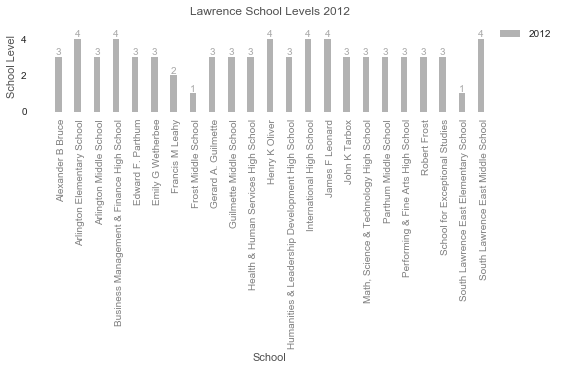

In [273]:
# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2012lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['level_2012']) )


# number of bars
N1 = len(dfplot1)
ind = np.arange(0, N1 * 1.5, 1.5)#np.arange(N1)

# width of bars and opacity
width = 0.5
opacity=0.6

fig, ax = plt.subplots()

    
# plots each bar
rects1 = plt.bar(ind+ (width*.5), x1, width,
                 alpha=opacity,
                 color='gray',
                 label='2012')

#rects2 = plt.bar(ind + (width*1.5), x2, width, 
#                 alpha=opacity,
#                 color='C5',
#                 label='2016')
#rects2[1].set_color('C1')

# add some text for labels, title and axes ticks
plt.xlabel('School',alpha=0.8)
plt.ylabel('School Level',alpha=0.8)
plt.title('Lawrence School Levels 2012',alpha=0.8)
plt.xticks(ind + width , dfplot1['school'], rotation=90)
plt.legend(bbox_to_anchor=(.97, 1), loc=2)

# label the bars
for rect, label in zip(rects1, [ round(elem) for elem in x1 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.4)

#for rect, label in zip(rects2, [ round(elem) for elem in x2 ]):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.7)
    
# set y range
plt.ylim([0,5])

fig.tight_layout(pad=2) 
plt.subplots_adjust(right=.9)

plt.savefig('plots_district//school_level_comparison_2012_labeled.png', dpi=600)

plt.show()


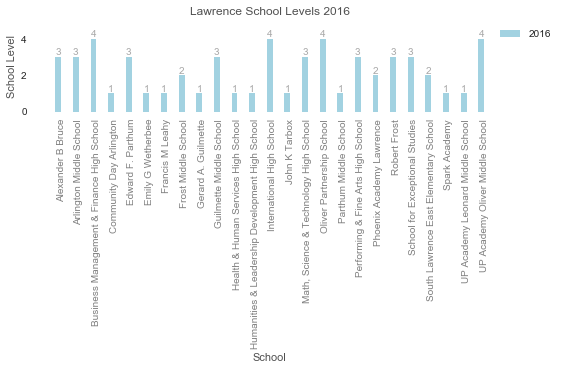

In [274]:
# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2016lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['level_2016']) )
    

# number of bars
N1 = len(dfplot1)
ind = np.arange(0, N1 * 1.5, 1.5)#np.arange(N1)

# width of bars and opacity
width = 0.5
opacity=0.6

fig, ax = plt.subplots()

    
# plots each bar
rects1 = plt.bar(ind+ (width*.5), x1, width,
                 alpha=opacity,
                 color='C5',
                 label='2016')

#rects2 = plt.bar(ind + (width*1.5), x2, width, 
#                 alpha=opacity,
#                 color='C5',
#                 label='2016')
#rects2[1].set_color('C1')

# add some text for labels, title and axes ticks
plt.xlabel('School',alpha=0.8)
plt.ylabel('School Level',alpha=0.8)
plt.title('Lawrence School Levels 2016',alpha=0.8)
plt.xticks(ind + width , dfplot1['school'], rotation=90)
plt.legend(bbox_to_anchor=(.97, 1), loc=2)

# label the bars
for rect, label in zip(rects1, [ round(elem) for elem in x1 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.4)

#for rect, label in zip(rects2, [ round(elem) for elem in x2 ]):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.7)
    
# set y range
plt.ylim([0,5])

fig.tight_layout(pad=2) 
plt.subplots_adjust(right=.9)

plt.savefig('plots_district//school_level_comparison_2016_labeled.png', dpi=600)

plt.show()


In [233]:
df2016lawrence[:1]

,school,org_code,level_2016,school_type,district,student_count,ell_nmbr,ell_prcnt,high_needs_nmbr,high_needs_prcnt,...,pro_ela,pro_mth,ni_ela,ni_mth,fail_ela,fail_mth,cpi_ela,cpi_mth,sgp_ela,sgp_mth
677,Alexander B Bruce,1490015,3,Elementary-Middle School,Lawrence,531.0,176.0,33.3,446.0,84.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


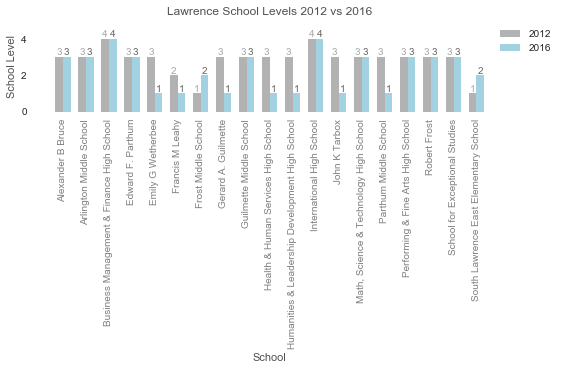

In [275]:
# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = pd.merge(df2016lawrence, df2012lawrence, on='school')

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['level_2012']) )
                   
x2 = []
for index, row in dfplot1.iterrows():
    x2.append( (row['level_2016']) )
    

# number of bars
N1 = len(dfplot1)
ind = np.arange(0, N1 * 1.5, 1.5)#np.arange(N1)

# width of bars and opacity
width = 0.5
opacity=0.6

fig, ax = plt.subplots()

    
# plots each bar
rects1 = plt.bar(ind+ (width*.5), x1, width,
                 alpha=opacity,
                 color='gray',
                 label='2012')

rects2 = plt.bar(ind + (width*1.5), x2, width, 
                 alpha=opacity,
                 color='C5',
                 label='2016')

# add some text for labels, title and axes ticks
plt.xlabel('School',alpha=0.8)
plt.ylabel('School Level',alpha=0.8)
plt.title('Lawrence School Levels 2012 vs 2016',alpha=0.8)
plt.xticks(ind + width , dfplot1['school'], rotation=90)
plt.legend(bbox_to_anchor=(.97, 1), loc=2)

# label the bars
for rect, label in zip(rects1, [ round(elem) for elem in x1 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.4)

for rect, label in zip(rects2, [ round(elem) for elem in x2 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.7)
    
# set y range
plt.ylim([0,5])

fig.tight_layout(pad=2, w_pad=10) 
plt.subplots_adjust(right=.9)

plt.savefig('plots_district//school_level_comparison_2012vs2016_labeled.png', dpi=600)

plt.show()


In [282]:
df2015lawrence[:1]

,school,org_code,level_2015,school_type,district,student_count,ell_nmbr,ell_prcnt,high_needs_nmbr,high_needs_prcnt,...,pro_ela,pro_mth,ni_ela,ni_mth,fail_ela,fail_mth,cpi_ela,cpi_mth,sgp_ela,sgp_mth
670,Alexander B Bruce,1490015,3,Elementary-Middle School,Lawrence,543,154,28.6,445,82.6,...,29.0,27.0,43.0,31.0,24.0,29.0,65.8,65.2,45.0,43.0


In [280]:
df2016lawrence.columns.tolist()

['school',
 'org_code',
 'level_2016',
 'school_type',
 'district',
 'student_count',
 'ell_nmbr',
 'ell_prcnt',
 'high_needs_nmbr',
 'high_needs_prcnt',
 'adv_ela',
 'adv_mth',
 'pro_ela',
 'pro_mth',
 'ni_ela',
 'ni_mth',
 'fail_ela',
 'fail_mth',
 'cpi_ela',
 'cpi_mth',
 'sgp_ela',
 'sgp_mth']

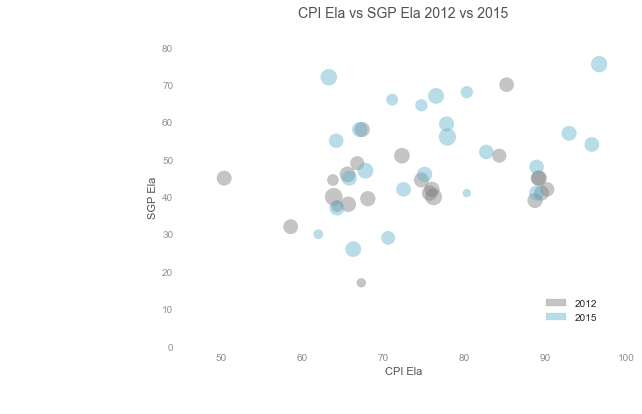

In [303]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2012lawrence
dfplot2 = df2015lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['cpi_ela']) )

x2 = []
for index, row in dfplot2.iterrows():
    x2.append( (row['cpi_ela']))

y1 = []
for index, row in dfplot1.iterrows():
    y1.append( (row['sgp_ela'])  )

y2 = []
for index, row in dfplot2.iterrows():
    y2.append( (row['sgp_ela'])  )

x = x1 + x2

y = y1 + y2
    
#xline = np.array(x)
#yline = np.array(y)

area1 = []
for index, row in dfplot1.iterrows():
    area1.append( (row['student_count']) * 0.4 )

area2 = []
for index, row in dfplot2.iterrows():
    area2.append( (row['student_count']) * 0.4 )
    
area = area1 + area2

labels1 = []
for index, row in dfplot1.iterrows():
    labels1.append( row['school'] )

labels2 = []
for index, row in dfplot2.iterrows():
    labels2.append( row['school'] )

labels = labels1 + labels2
    
colors = []

for i in range(len(labels1)):
    colors.append('gray')
    
for i in range(len(labels2)):
    colors.append('C5')


# add some text for labels, title and axes ticks
plt.xlabel('CPI Ela',alpha=0.8,y=5)
plt.ylabel('SGP Ela',alpha=0.8)
plt.title('CPI Ela vs SGP Ela 2012 vs 2015',alpha=0.8, fontsize=14,y=1.08)
plt.xticks(alpha=0.9)
plt.yticks(alpha=0.5)

patch1 = mpatches.Patch(color='gray', label='2012', alpha=0.45)
patch2 = mpatches.Patch(color='C5', label='2015', alpha=0.45)
plt.legend(handles=[patch1, patch2],bbox_to_anchor=(0.8, 0.05, 1., .102), loc=3)


# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2) 
plt.scatter(
    x,y, marker='o', c=colors, s=area, alpha=0.45,
    cmap=plt.get_cmap('Spectral'))

#model = np.polyfit(xline, yline, 1)
#predicted = np.polyval(model, [0,100])

for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, -11),
        textcoords='offset points', ha='right', va='bottom',fontsize=9, alpha=0.0, #change to higher for labels
        bbox=dict(boxstyle='round,pad=.1', fc='white', alpha=0.0))

plt.xlim(45, 100)
plt.ylim(0, 80)


#plt.plot([0,100], predicted, lw=2)

plt.subplots_adjust(top=0.88)


plt.savefig('plots_district//scatter_cpivssgp_comparison2012vs2015_ela.png', dpi=600, )


plt.show()

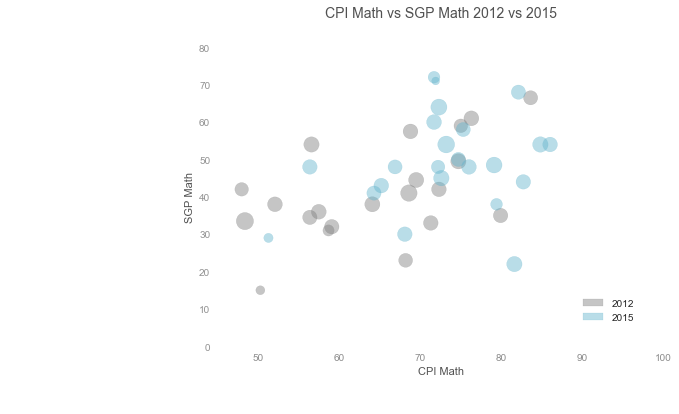

In [302]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2012lawrence
dfplot2 = df2015lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['cpi_mth']) )

x2 = []
for index, row in dfplot2.iterrows():
    x2.append( (row['cpi_mth']))

y1 = []
for index, row in dfplot1.iterrows():
    y1.append( (row['sgp_mth'])  )

y2 = []
for index, row in dfplot2.iterrows():
    y2.append( (row['sgp_mth'])  )

x = x1 + x2

y = y1 + y2
    
#xline = np.array(x)
#yline = np.array(y)

area1 = []
for index, row in dfplot1.iterrows():
    area1.append( (row['student_count']) * 0.4 )

area2 = []
for index, row in dfplot2.iterrows():
    area2.append( (row['student_count']) * 0.4 )
    
area = area1 + area2

labels1 = []
for index, row in dfplot1.iterrows():
    labels1.append( row['school'] )

labels2 = []
for index, row in dfplot2.iterrows():
    labels2.append( row['school'] )

labels = labels1 + labels2
    
colors = []

for i in range(len(labels1)):
    colors.append('gray')
    
for i in range(len(labels2)):
    colors.append('C5')


# add some text for labels, title and axes ticks
plt.xlabel('CPI Math',alpha=0.8,y=5)
plt.ylabel('SGP Math',alpha=0.8)
plt.title('CPI Math vs SGP Math 2012 vs 2015',alpha=0.8, fontsize=14,y=1.08)
plt.xticks(alpha=0.9)
plt.yticks(alpha=0.5)

patch1 = mpatches.Patch(color='gray', label='2012', alpha=0.45)
patch2 = mpatches.Patch(color='C5', label='2015', alpha=0.45)
plt.legend(handles=[patch1, patch2],bbox_to_anchor=(0.8, 0.05, 1., .102), loc=3)


# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2) 
plt.scatter(
    x,y, marker='o', c=colors, s=area, alpha=0.45,
    cmap=plt.get_cmap('Spectral'))

#model = np.polyfit(xline, yline, 1)
#predicted = np.polyval(model, [0,100])

for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, -11),
        textcoords='offset points', ha='right', va='bottom',fontsize=9, alpha=0.0, #change to higher for labels
        bbox=dict(boxstyle='round,pad=.1', fc='white', alpha=0.0))

plt.xlim(45, 100)
plt.ylim(0, 80)


#plt.plot([0,100], predicted, lw=2)

plt.subplots_adjust(top=0.88)


plt.savefig('plots_district//scatter_cpivssgp_comparison2012vs2015_math.png', dpi=600, )


plt.show()

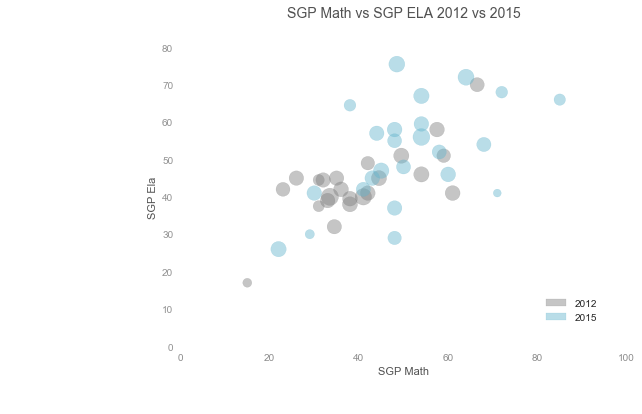

In [310]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2012lawrence
dfplot2 = df2015lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['sgp_mth']) )

x2 = []
for index, row in dfplot2.iterrows():
    x2.append( (row['sgp_mth']))

y1 = []
for index, row in dfplot1.iterrows():
    y1.append( (row['sgp_ela'])  )

y2 = []
for index, row in dfplot2.iterrows():
    y2.append( (row['sgp_ela'])  )

x = x1 + x2

y = y1 + y2
    
#xline = np.array(x)
#yline = np.array(y)

area1 = []
for index, row in dfplot1.iterrows():
    area1.append( (row['student_count']) * 0.4 )

area2 = []
for index, row in dfplot2.iterrows():
    area2.append( (row['student_count']) * 0.4 )
    
area = area1 + area2

labels1 = []
for index, row in dfplot1.iterrows():
    labels1.append( row['school'] )

labels2 = []
for index, row in dfplot2.iterrows():
    labels2.append( row['school'] )

labels = labels1 + labels2
    
colors = []

for i in range(len(labels1)):
    colors.append('gray')
    
for i in range(len(labels2)):
    colors.append('C5')


# add some text for labels, title and axes ticks
plt.xlabel('SGP Math',alpha=0.8,y=5)
plt.ylabel('SGP Ela',alpha=0.8)
plt.title('SGP Math vs SGP ELA 2012 vs 2015',alpha=0.8, fontsize=14,y=1.08)
plt.xticks(alpha=0.9)
plt.yticks(alpha=0.5)

patch1 = mpatches.Patch(color='gray', label='2012', alpha=0.45)
patch2 = mpatches.Patch(color='C5', label='2015', alpha=0.45)
plt.legend(handles=[patch1, patch2],bbox_to_anchor=(0.8, 0.05, 1., .102), loc=3)


# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2) 
plt.scatter(
    x,y, marker='o', c=colors, s=area, alpha=0.45,
    cmap=plt.get_cmap('Spectral'))

#model = np.polyfit(xline, yline, 1)
#predicted = np.polyval(model, [0,100])

for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, -11),
        textcoords='offset points', ha='right', va='bottom',fontsize=9, alpha=0.0, #change to higher for labels
        bbox=dict(boxstyle='round,pad=.1', fc='white', alpha=0.0))

plt.xlim(0, 100)
plt.ylim(0, 80)


#plt.plot([0,100], predicted, lw=2)

plt.subplots_adjust(top=0.88)


plt.savefig('plots_district//scatter_sgpvssgp_comparison2012vs2015_mathvsela.png', dpi=600, )


plt.show()

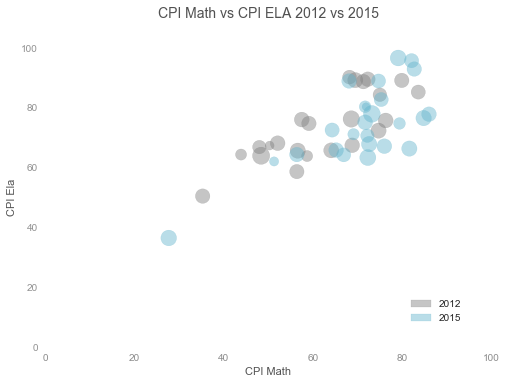

In [309]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2012lawrence
dfplot2 = df2015lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['cpi_mth']) )

x2 = []
for index, row in dfplot2.iterrows():
    x2.append( (row['cpi_mth']))

y1 = []
for index, row in dfplot1.iterrows():
    y1.append( (row['cpi_ela'])  )

y2 = []
for index, row in dfplot2.iterrows():
    y2.append( (row['cpi_ela'])  )

x = x1 + x2

y = y1 + y2
    
#xline = np.array(x)
#yline = np.array(y)

area1 = []
for index, row in dfplot1.iterrows():
    area1.append( (row['student_count']) * 0.4 )

area2 = []
for index, row in dfplot2.iterrows():
    area2.append( (row['student_count']) * 0.4 )
    
area = area1 + area2

labels1 = []
for index, row in dfplot1.iterrows():
    labels1.append( row['school'] )

labels2 = []
for index, row in dfplot2.iterrows():
    labels2.append( row['school'] )

labels = labels1 + labels2
    
colors = []

for i in range(len(labels1)):
    colors.append('gray')
    
for i in range(len(labels2)):
    colors.append('C5')


# add some text for labels, title and axes ticks
plt.xlabel('CPI Math',alpha=0.8,y=5)
plt.ylabel('CPI Ela',alpha=0.8)
plt.title('CPI Math vs CPI ELA 2012 vs 2015',alpha=0.8, fontsize=14,y=1.08)
plt.xticks(alpha=0.9)
plt.yticks(alpha=0.5)

patch1 = mpatches.Patch(color='gray', label='2012', alpha=0.45)
patch2 = mpatches.Patch(color='C5', label='2015', alpha=0.45)
plt.legend(handles=[patch1, patch2],bbox_to_anchor=(0.8, 0.05, 1., .102), loc=3)


# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2) 
plt.scatter(
    x,y, marker='o', c=colors, s=area, alpha=0.45,
    cmap=plt.get_cmap('Spectral'))

#model = np.polyfit(xline, yline, 1)
#predicted = np.polyval(model, [0,100])

for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, -11),
        textcoords='offset points', ha='right', va='bottom',fontsize=9, alpha=0.0, #change to higher for labels
        bbox=dict(boxstyle='round,pad=.1', fc='white', alpha=0.0))

plt.xlim(0, 100)
plt.ylim(0, 100)


#plt.plot([0,100], predicted, lw=2)

plt.subplots_adjust(top=0.88)


plt.savefig('plots_district//scatter_cpivscpi_comparison2012vs2015_mathvsela.png', dpi=600, )


plt.show()

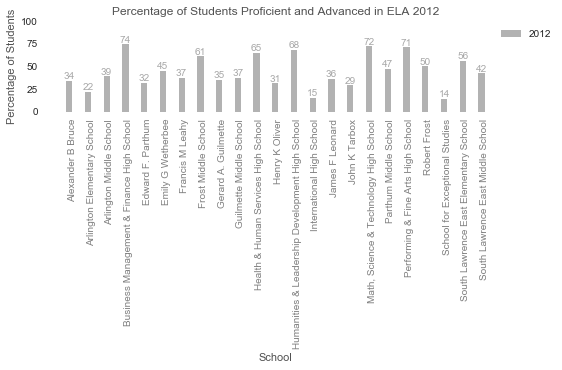

In [315]:
# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2012lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['adv_ela']) + (row['pro_ela']) )


# number of bars
N1 = len(dfplot1)
ind = np.arange(0, N1 * 1.5, 1.5)#np.arange(N1)

# width of bars and opacity
width = 0.5
opacity=0.6

fig, ax = plt.subplots()

    
# plots each bar
rects1 = plt.bar(ind+ (width*.5), x1, width,
                 alpha=opacity,
                 color='gray',
                 label='2012')

#rects2 = plt.bar(ind + (width*1.5), x2, width, 
#                 alpha=opacity,
#                 color='C5',
#                 label='2016')
#rects2[1].set_color('C1')

# add some text for labels, title and axes ticks
plt.xlabel('School',alpha=0.8)
plt.ylabel('Percentage of Students',alpha=0.8)
plt.title('Percentage of Students Proficient and Advanced in ELA 2012',alpha=0.8)
plt.xticks(ind + width , dfplot1['school'], rotation=90)
plt.legend(bbox_to_anchor=(.97, 1), loc=2)

# label the bars
for rect, label in zip(rects1, [ round(elem) for elem in x1 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.4)

# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2) 
plt.subplots_adjust(right=.9)

plt.savefig('plots_district//proficient+advanced_ela_percentage_2012.png', dpi=600)

plt.show()


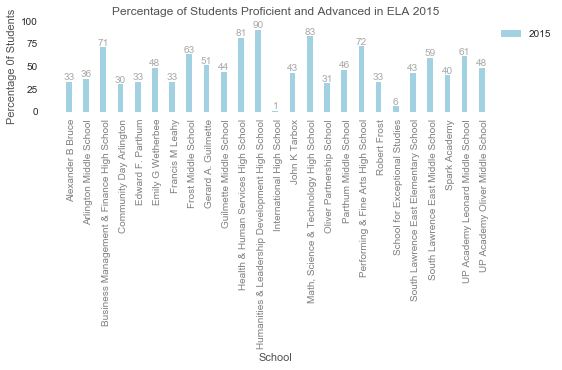

In [316]:
# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = df2015lawrence

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['adv_ela']) + (row['pro_ela']) )


# number of bars
N1 = len(dfplot1)
ind = np.arange(0, N1 * 1.5, 1.5)#np.arange(N1)

# width of bars and opacity
width = 0.5
opacity=0.6

fig, ax = plt.subplots()

    
# plots each bar
rects1 = plt.bar(ind+ (width*.5), x1, width,
                 alpha=opacity,
                 color='C5',
                 label='2015')

#rects2 = plt.bar(ind + (width*1.5), x2, width, 
#                 alpha=opacity,
#                 color='C5',
#                 label='2015')
#rects2[1].set_color('C1')

# add some text for labels, title and axes ticks
plt.xlabel('School',alpha=0.8)
plt.ylabel('Percentage of Students',alpha=0.8)
plt.title('Percentage of Students Proficient and Advanced in ELA 2015',alpha=0.8)
plt.xticks(ind + width , dfplot1['school'], rotation=90)
plt.legend(bbox_to_anchor=(.97, 1), loc=2)

# label the bars
for rect, label in zip(rects1, [ round(elem) for elem in x1 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.4)

# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2) 
plt.subplots_adjust(right=.9)

plt.savefig('plots_district//proficient+advanced_ela_percentage_2015.png', dpi=600)

plt.show()


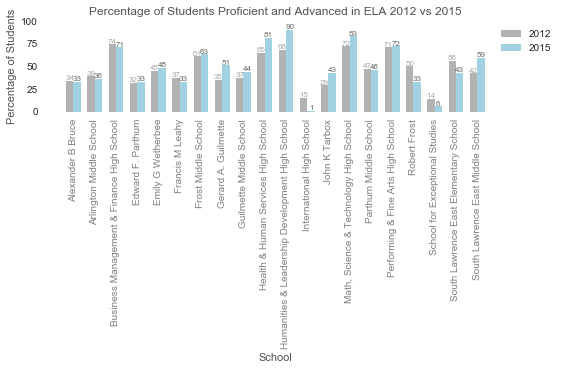

In [333]:
# plot style
plt.style.use('seaborn')

# parameters to change plot style features
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor']='w'
plt.rcParams['xtick.color']='gray'

dfplot1 = pd.merge(df2012lawrence,df2015lawrence, on='school')

x1 = []
for index, row in dfplot1.iterrows():
    x1.append( (row['adv_ela_x']) + (row['pro_ela_x']) )
                   
x2 = []
for index, row in dfplot1.iterrows():
    x2.append( (row['adv_ela_y']) + (row['pro_ela_y']) )
    

# number of bars
N1 = len(dfplot1)
ind = np.arange(0, N1 * 2, 2)#np.arange(N1)

# width of bars and opacity
width = 0.7
opacity=0.6

fig, ax = plt.subplots()

    
# plots each bar
rects1 = plt.bar(ind+ (width*.5), x1, width,
                 alpha=opacity,
                 color='gray',
                 label='2012')

rects2 = plt.bar(ind + (width*1.5), x2, width, 
                 alpha=opacity,
                 color='C5',
                 label='2015')

# add some text for labels, title and axes ticks
plt.xlabel('School',alpha=0.8)
plt.ylabel('Percentage of Students',alpha=0.8)
plt.title('Percentage of Students Proficient and Advanced in ELA 2012 vs 2015',alpha=0.8)
plt.xticks(ind + width , dfplot1['school'], rotation=90)
plt.legend(bbox_to_anchor=(.97, 1), loc=2)

# label the bars
for rect, label in zip(rects1, [ round(elem) for elem in x1 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.4, fontsize=8)

for rect, label in zip(rects2, [ round(elem) for elem in x2 ]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', alpha=0.7, fontsize=8)
    
# set y range
plt.ylim([0,100])

fig.tight_layout(pad=2, w_pad=10) 
plt.subplots_adjust(right=.9)

plt.savefig('plots_district//proficient+advanced_ela_percentage_merged_2012vs2016.png', dpi=600)

plt.show()
